Load Datasets and File

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


In [213]:
columns = ['id', 'host id', 'host_identity_verified', 'neighbourhood group', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price' , 'service fee', 'minimum nights', 'number of reviews', 'review rate number', 'availability 365', 'house_rules' ]
file = pd.read_csv('Airbnb_Open_Data.csv', sep = ',', usecols = columns)
file.head(3)



,id,host id,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,availability 365,house_rules
0,1001254,80014485718,unconfirmed,Brooklyn,Kensington,False,strict,Private room,2020.0,$966,$193,10.0,9.0,4.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,52335172823,verified,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,78829239556,NaN,Manhattan,Harlem,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,5.0,352.0,"I encourage you to use my kitchen, cooking and..."


Verifing Dataset Main Infos

In [214]:

file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      102599 non-null  int64  
 1   host id                 102599 non-null  int64  
 2   host_identity_verified  102310 non-null  object 
 3   neighbourhood group     102570 non-null  object 
 4   neighbourhood           102583 non-null  object 
 5   instant_bookable        102494 non-null  object 
 6   cancellation_policy     102523 non-null  object 
 7   room type               102599 non-null  object 
 8   Construction year       102385 non-null  float64
 9   price                   102352 non-null  object 
 10  service fee             102326 non-null  object 
 11  minimum nights          102190 non-null  float64
 12  number of reviews       102416 non-null  float64
 13  review rate number      102273 non-null  float64
 14  availability 365    

In [215]:
file.columns

Index(['id', 'host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'review rate number', 'availability 365',
       'house_rules'],
      dtype='object')

In [216]:
file.shape

(102599, 16)

In [217]:
# Remove NaNs and adjusting column index
file.dropna(inplace = True)
file.columns = [col.lower().replace(" ","_") for col in file.columns]


In [218]:
file.isnull().sum()

id                        0
host_id                   0
host_identity_verified    0
neighbourhood_group       0
neighbourhood             0
instant_bookable          0
cancellation_policy       0
room_type                 0
construction_year         0
price                     0
service_fee               0
minimum_nights            0
number_of_reviews         0
review_rate_number        0
availability_365          0
house_rules               0
dtype: int64

In [219]:
# calculate the % missing values
percentage_result = file.isnull().sum()/file.shape[0] * 100

# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,id,0.0
1,host_id,0.0
2,host_identity_verified,0.0
3,neighbourhood_group,0.0
4,neighbourhood,0.0
5,instant_bookable,0.0
6,cancellation_policy,0.0
7,room_type,0.0
8,construction_year,0.0
9,price,0.0


In [220]:
file.describe()

,id,host_id,construction_year,minimum_nights,number_of_reviews,review_rate_number,availability_365
count,4.935100e+04,4.935100e+04,49351.000000,49351.000000,49351.000000,49351.000000,49351.000000
mean,2.709275e+07,4.921793e+10,2012.505704,6.976231,23.435047,3.227412,135.544204
std,1.823521e+07,2.849242e+10,5.747289,34.697630,41.448922,1.316398,134.831237
min,1.001254e+06,1.236005e+08,2003.000000,-1223.000000,0.000000,1.000000,-10.000000
25%,1.151464e+07,2.464954e+10,2008.000000,1.000000,1.000000,2.000000,0.000000
50%,2.174572e+07,4.905773e+10,2012.000000,2.000000,6.000000,3.000000,89.000000
75%,4.704024e+07,7.387559e+10,2018.000000,5.000000,26.000000,4.000000,256.000000
max,5.735968e+07,9.876097e+10,2022.000000,5645.000000,629.000000,5.000000,426.000000


Adjusting unformated datas

In [221]:
# for columns price and service_fee remove $ and convert data type
file = file.replace('\$','',regex=True)
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49351 entries, 0 to 102595
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      49351 non-null  int64  
 1   host_id                 49351 non-null  int64  
 2   host_identity_verified  49351 non-null  object 
 3   neighbourhood_group     49351 non-null  object 
 4   neighbourhood           49351 non-null  object 
 5   instant_bookable        49351 non-null  object 
 6   cancellation_policy     49351 non-null  object 
 7   room_type               49351 non-null  object 
 8   construction_year       49351 non-null  float64
 9   price                   49351 non-null  object 
 10  service_fee             49351 non-null  object 
 11  minimum_nights          49351 non-null  float64
 12  number_of_reviews       49351 non-null  float64
 13  review_rate_number      49351 non-null  float64
 14  availability_365        49351 non-nul

In [222]:
file['price'] = file['price'].astype(str).str.replace("," , "").astype(float)

In [223]:
file['service_fee'] = file.service_fee.astype('float')

In [224]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49351 entries, 0 to 102595
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      49351 non-null  int64  
 1   host_id                 49351 non-null  int64  
 2   host_identity_verified  49351 non-null  object 
 3   neighbourhood_group     49351 non-null  object 
 4   neighbourhood           49351 non-null  object 
 5   instant_bookable        49351 non-null  object 
 6   cancellation_policy     49351 non-null  object 
 7   room_type               49351 non-null  object 
 8   construction_year       49351 non-null  float64
 9   price                   49351 non-null  float64
 10  service_fee             49351 non-null  float64
 11  minimum_nights          49351 non-null  float64
 12  number_of_reviews       49351 non-null  float64
 13  review_rate_number      49351 non-null  float64
 14  availability_365        49351 non-nul

In [225]:
#Most of collumns have less then 1% os missing values, so I decided to keep these datas and for the column house_rules I decided not to use as information for now.
file.drop(columns = ["house_rules"], inplace = True)

Linear Regression

       For the first analysis I decided to do is the relationship of the price and year of contruction. As the types of rooms interfere on price, I did a analysis for each type of room

In [226]:
file["room_type"].value_counts()

Entire home/apt    25081
Private room       23163
Shared room         1107
Name: room_type, dtype: int64

In [254]:
#First for entire home/apt
linear_reg = file.loc[file.room_type == 'Private room']

data_lin_reg = linear_reg[['price', 'service_fee']]

data_lin_reg.shape

(23163, 2)

count    23163.000000
mean       622.530458
std        330.758579
min         50.000000
25%        339.000000
50%        619.000000
75%        907.000000
max       1200.000000
Name: price, dtype: float64

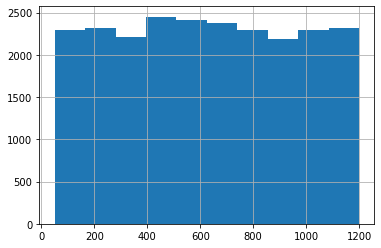

In [255]:
linear_reg['price'].hist()
linear_reg['price'].describe()

count    23163.000000
mean       124.506541
std         66.151731
min         10.000000
25%         68.000000
50%        124.000000
75%        181.000000
max        240.000000
Name: service_fee, dtype: float64

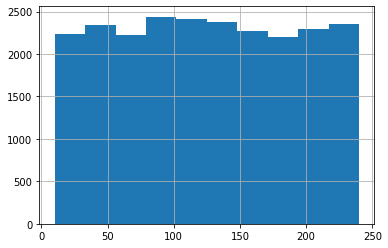

In [256]:
linear_reg['service_fee'].hist()
linear_reg['service_fee'].describe()

        Looking at the histograms it's possible to see the histograms have an homogeneous profile

<module 'matplotlib.pyplot' from 'c:\\Users\\Monike\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

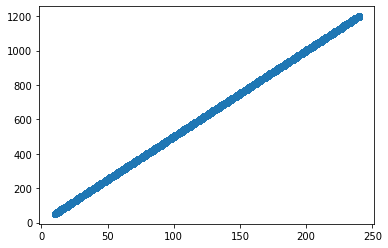

In [257]:
import matplotlib.pyplot as plt
plt.scatter(linear_reg['service_fee'], linear_reg['price'])
plt

In [258]:
data_lin_reg.corr()

,price,service_fee
price,1.000000,0.999991
service_fee,0.999991,1.000000


In [259]:
import statsmodels.api as sm

In [261]:
modelo = sm.OLS(linear_reg['service_fee'], linear_reg['price']).fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:            service_fee   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.737e+09
Date:                Fri, 16 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:31:30   Log-Likelihood:                         -3652.1
No. Observations:               23163   AIC:                                      7306.
Df Residuals:                   23162   BIC:                                      7314.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

        service_fee and price are high correlated, this is expected since fees charged by Airbnb are a percentage of the price.